In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [3]:
path="C:\\Users\\1-10\\Desktop\\python\\01_hitters\\Hitters.csv"

In [4]:
Hitters=pd.read_csv(path)
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 53.0+ KB


In [5]:
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


#### 데이터 처리
* salary의 값이 없는 observation 제거
* Unnamed:0 컬럼 이름 변경 & - 제거
* 결과 변수 salary의 log 변환

In [6]:
Hitters.dropna(inplace=True)
Hitters.shape

(263, 21)

In [20]:
Hitters.rename(columns={"Unnamed: 0":"name"},inplace=True)
Hitters.columns

Index(['name', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [36]:
Hitters.name[321].replace("-","")

'Willie Wilson'

In [39]:
Hitters['name']=Hitters['name'].apply(lambda x : x.replace("-",""))

In [40]:
Hitters['name']

1            Alan Ashby
2           Alvin Davis
3          Andre Dawson
4      Andres Galarraga
5       Alfredo Griffin
             ...       
317        Willie McGee
318     Willie Randolph
319      Wayne Tolleson
320       Willie Upshaw
321       Willie Wilson
Name: name, Length: 263, dtype: object

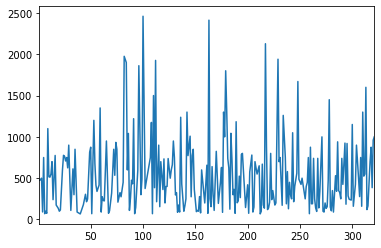

In [41]:
Hitters.Salary.plot()

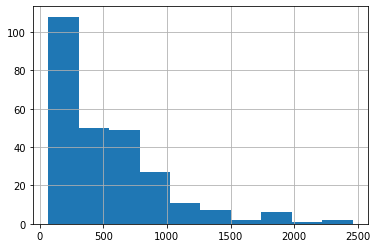

In [42]:
Hitters.Salary.hist()

In [43]:
# log 변경
Hitters['Salary']=np.log(Hitters.Salary)

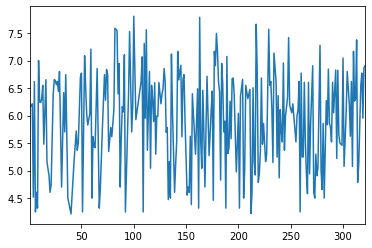

In [44]:
Hitters.Salary.plot()

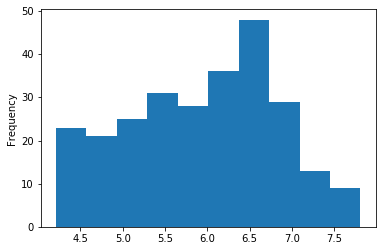

In [45]:
Hitters.Salary.plot(kind='hist')

In [46]:
# reindex
Hitters.dropna(inplace=True)
Hitters.reset_index(drop=True)
Hitters.head()

,name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,6.163315,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,6.173786,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,6.214608,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,4.516339,N
5,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,6.620073,A


In [47]:
X=Hitters.loc[:,['Years','Hits']]
y=Hitters.Salary

reg_tree=tree.DecisionTreeRegressor(max_leaf_nodes=3)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
fig,ax1=plt.subplots(nrows=1, ncols=1, figsize=(7,5))

Hitters.plot('Years','Hits',kind='scatter',c='Salary', ax=ax1, xticks=[1,4.5,24],yticks=[1,117.5,238])

In [49]:
reg_tree.tree_.threshold

array([  4.5,  -2. , 117.5,  -2. ,  -2. ])

In [50]:
import os

In [51]:
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin'

In [53]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

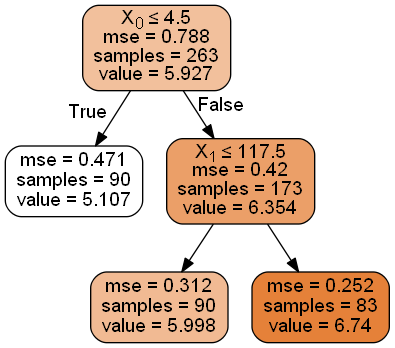

In [54]:
dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

* samples : 해당 노드에 속한 sample들의 개수
* value : 해당 노드에 속한 sample들의 mean response(response 평균)
* mse : sample들의 실제 response와 'value'간의 Mean Squared Error

In [55]:
# Hitters 데이터 중에 qualitative 변수가 있으므로 이를 dummy encoding & 'name' column을 제거
Hitters_enc=pd.get_dummies(Hitters.drop('name',axis=1),drop_first=True)

# 모든 observation 활용
X=Hitters_enc.drop('Salary',axis=1)
y=Hitters_enc.Salary

# 최대 12단계로
reg_tree=tree.DecisionTreeRegressor(max_leaf_nodes=12)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=12, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [57]:
Hitters_enc.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0


In [58]:
reg_tree.tree_.threshold

array([1452. ,  182. ,  117.5,    5.5,  465. ,   -2. ,  132. ,   25.5,
        273. ,  821. ,   60.5,   -2. ,   -2. ,   -2. ,   -2. ,   21. ,
         -2. ,   -2. ,   -2. ,   -2. ,   -2. ,   -2. ,   -2. ])

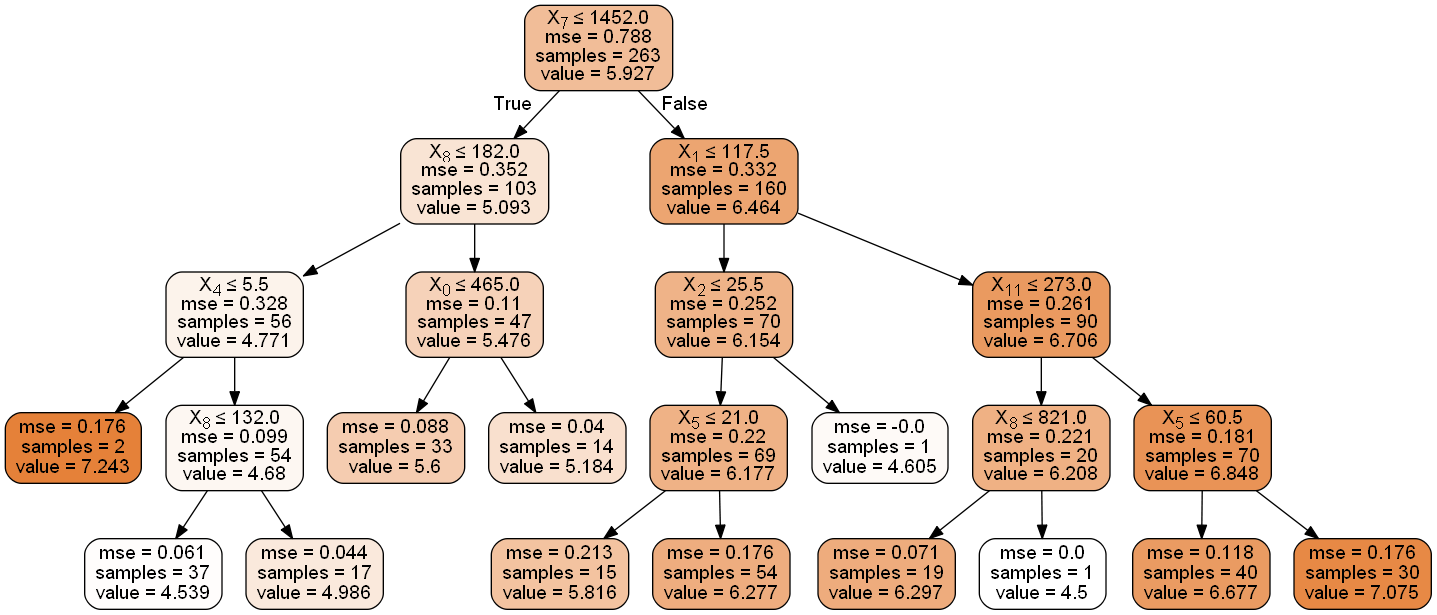

In [59]:
dot_data = StringIO()

export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### 그럼 어느 단계까지 해야 좋은지

In [61]:
from sklearn.model_selection import cross_val_score

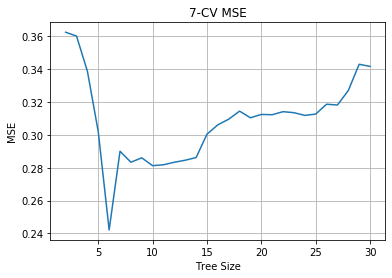

In [63]:
tree_sizes=range(2,31)
MSE_scores=[]

# 7로..7-fold
for size in tree_sizes:
    reg_tree=tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s= -cross_val_score(reg_tree,X,y,cv=7,scoring='neg_mean_squared_error') # scoring이 -값으로 반환되기 때문에 cross_val_score앞에 -를 붙여 양수로 다시 변환
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [67]:
# 다시 6개로
reg_tree_best=tree.DecisionTreeRegressor(max_leaf_nodes=6, random_state=123)
reg_tree_best.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=6, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

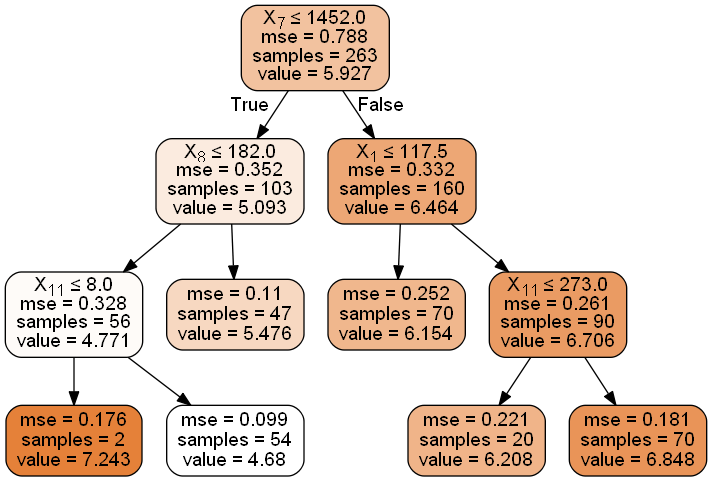

In [68]:
dot_data = StringIO()

export_graphviz(reg_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [69]:
feature_importance=pd.DataFrame({'feature':X.columns, 'importance':reg_tree_best.feature_importances_})

feature_importance.sort_values(by='importance',ascending=False)

,feature,importance
7,CAtBat,0.729415
11,CRBI,0.117926
8,CHits,0.078575
1,Hits,0.074083
0,AtBat,0.000000
17,Division_W,0.000000
16,League_N,0.000000
15,Errors,0.000000
14,Assists,0.000000
13,PutOuts,0.000000


#### 테스트 : carseat

In [70]:
path="C:\\Users\\1-10\\Desktop\\python\\Carseats.csv"

In [71]:
Carseats=pd.read_csv(path)
print(Carseats.shape)
Carseats.head()

(400, 12)


,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [72]:
# 1컬럼은 필요가 없어서 제거
del Carseats["Unnamed: 0"]
print(Carseats.shape)
Carseats.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Step1
* Sales의 값이 8이하 -0, 8초과 1로 설정
* Urban에서 No=>0, Yes=>1
* US에서 No=>0, Yes=>1
* 15개 잎

In [78]:
pd.factorize(Carseats["ShelveLoc"]) # 계열을 정수 식별자로 변환

(array([0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
        2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2,
        2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
        2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2,
        1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2,
        2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
        2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2,
        2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2,
        1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2,
        2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 

In [80]:
Carseats["ShelveLoc"]=pd.factorize(Carseats["ShelveLoc"])[0]
Carseats["ShelveLoc"]

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [81]:
Carseats['High']=Carseats["Sales"].apply(lambda x:0 if x<=8 else 1)

# 3 - class를 갖는 'Shalveloc'을 간단히 'factorize' 함수로 변환
Carseats["ShelveLoc"]=pd.factorize(Carseats["ShelveLoc"])[0]
Carseats["Urban"]=Carseats["Urban"].apply(lambda x: 0 if x=="No" else 1)
Carseats["US"]=Carseats["US"].apply(lambda x: 0 if x=="No" else 1)

X=Carseats.drop(['Sales','High'],axis=1)
y=Carseats["High"]

# 15개로 잎으로 제한
clf_tree=tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

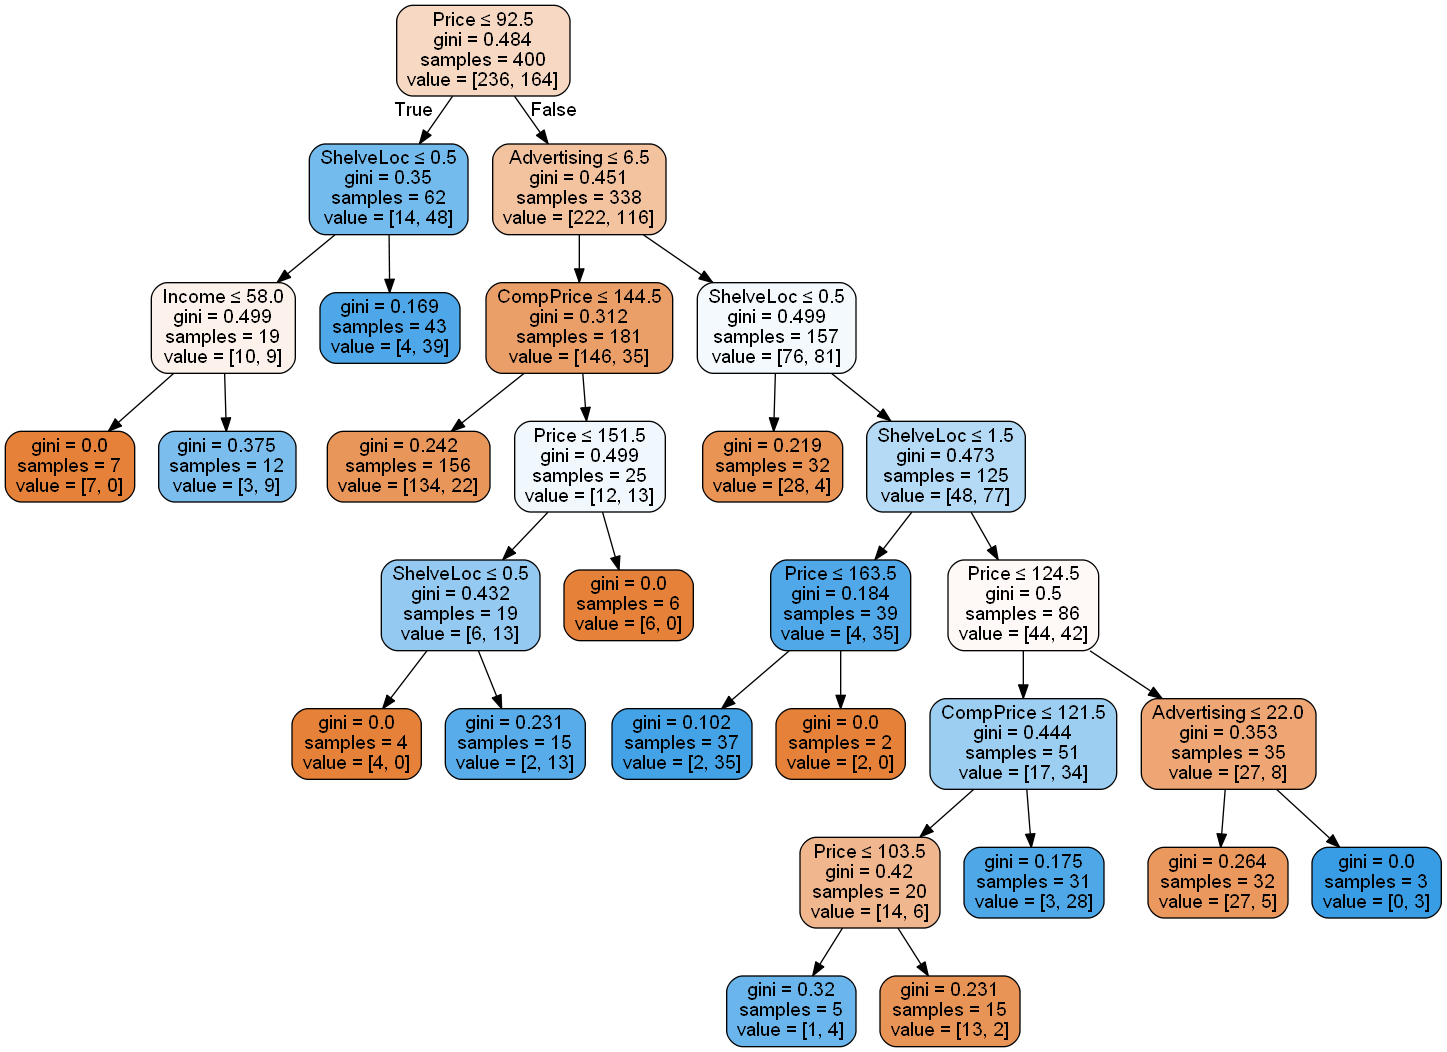

In [82]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)
# 아까처럼 컬럼 순서가 아니라 직접 컬럼 이름을 보기 위해서는 위의 feature_names를 사용

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Step2 
* 이 데이터를 가지고 train/test로 나누어서 해보자

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1234)
clf_tree=tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf_tree.fit(X_train,y_train)

y_pred=clf_tree.predict(X_test)

accuracy_score(y_test,y_pred)

0.7833333333333333

#### Step3
* 최적의 잎 갯수 찾기 : cv 이용

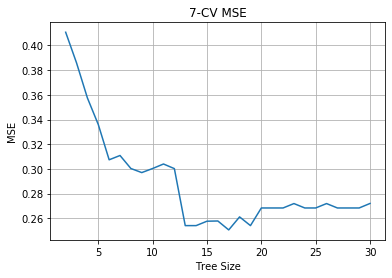

In [95]:
tree_sizes=range(2,31)
MSE_scores=[]

# 7로..7-fold
for size in tree_sizes:
    clf_tree=tree.DecisionTreeClassifier(max_leaf_nodes=size, random_state=123)
    MSE_s=1-cross_val_score(clf_tree,X_train,y_train,cv=7,scoring="accuracy") 
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger
plt.plot(tree_sizes, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [88]:
clf_tree_best=tree.DecisionTreeRegressor(max_leaf_nodes=6, random_state=123)
clf_tree_best.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=6, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

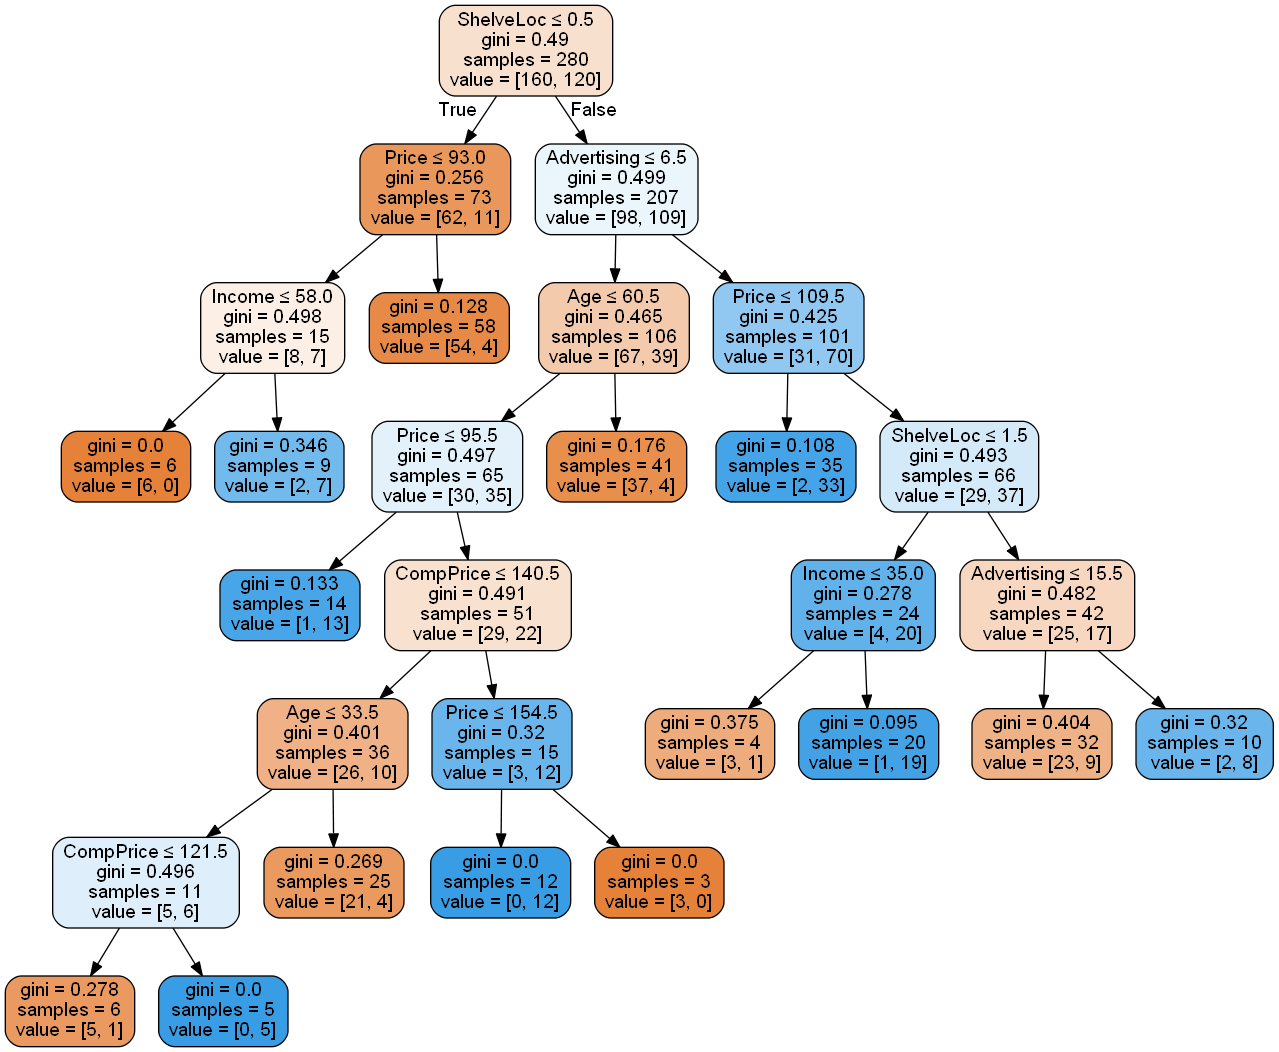

In [89]:
dot_data = StringIO()

export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)
# 아까처럼 컬럼 순서가 아니라 직접 컬럼 이름을 보기 위해서는 위의 feature_names를 사용

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Random Forest
* feature 수(max_features), minimum sample 갯수(min_samples_split), maximum depth(max_depth) 등을 cross_validation 통해 결정할 수 있다
* 중요한 parameter는 'n_estimators'와 max_features, n_estimator는 클수록 좋지만 대개 300에서 시작해 성능을 보아가며 조정

In [98]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 앞에서 사용한 one-hot-encoding 데이터 이용
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1234)

# tree를 500개, split할 때 6개 feature 중에서 선택
RF_cif=RandomForestClassifier(n_estimators=500, max_features=6, random_state=1234)

# Training set으로 RF regressor 학습
RF_cif.fit(X_train, y_train)

# Test with Test Set
y_pred=RF_cif.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8833333333333333


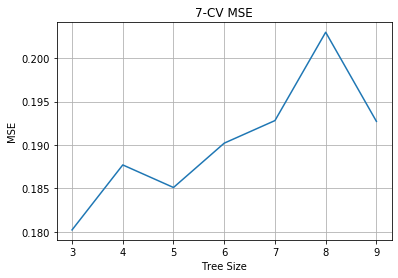

In [103]:
feature_size=range(3,10)
MSE_scores=[]

# 7로..7-fold
for size in feature_size:
    RF_cif=RandomForestClassifier(n_estimators=500, max_features=size, random_state=123)
    MSE_s=1-cross_val_score(RF_cif,X,y,cv=7,scoring="accuracy",n_jobs=-1) 
    MSE_scores.append(np.mean(MSE_s))
    
# plot CV-MSE as tree size gets bigger
plt.plot(feature_size, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [104]:
# tree를 500개, split할 때 5개 feature 중에서 선택
RF_cif=RandomForestClassifier(n_estimators=500,max_features=5, random_state=1234)

# Training set으로 RF regressor 학습
RF_cif.fit(X_train,y_train)

# test with test set
y_pred=RF_cif.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.875


In [107]:
d=pd.DataFrame({'feature':X.columns,'importance': RF_cif.feature_importances_}).sort_values(by='importance',ascending=False)
d


,feature,importance
4,Price,0.208217
6,Age,0.144831
5,ShelveLoc,0.140332
2,Advertising,0.125747
0,CompPrice,0.116571
1,Income,0.110084
3,Population,0.076509
7,Education,0.051670
9,US,0.013409
8,Urban,0.012629
